In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bank Customer Churn Prediction.csv")

In [3]:
df_original = df.copy()
df = df.set_index("customer_id")

In [4]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 11)

In [6]:
df.tail()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# **Exploratory Data Analysis (EDA)**

In [7]:
df.isnull().sum()

,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0
estimated_salary,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [9]:
print(df.columns.tolist())

['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [10]:
for col in df:
    print(f" '{col}' sütunundaki toplam kategori sayısı: {df[col].nunique()}")

 'credit_score' sütunundaki toplam kategori sayısı: 460
 'country' sütunundaki toplam kategori sayısı: 3
 'gender' sütunundaki toplam kategori sayısı: 2
 'age' sütunundaki toplam kategori sayısı: 70
 'tenure' sütunundaki toplam kategori sayısı: 11
 'balance' sütunundaki toplam kategori sayısı: 6382
 'products_number' sütunundaki toplam kategori sayısı: 4
 'credit_card' sütunundaki toplam kategori sayısı: 2
 'active_member' sütunundaki toplam kategori sayısı: 2
 'estimated_salary' sütunundaki toplam kategori sayısı: 9999
 'churn' sütunundaki toplam kategori sayısı: 2


In [11]:
for col in df:
    print(f"\n-- {col} sütunundaki kategoriler ve sayıları:")
    print(df[col].value_counts())
    print(f"Toplam kategori sayısı: {df[col].nunique()}")


-- credit_score sütunundaki kategoriler ve sayıları:
credit_score
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64
Toplam kategori sayısı: 460

-- country sütunundaki kategoriler ve sayıları:
country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Toplam kategori sayısı: 3

-- gender sütunundaki kategoriler ve sayıları:
gender
Male      5457
Female    4543
Name: count, dtype: int64
Toplam kategori sayısı: 2

-- age sütunundaki kategoriler ve sayıları:
age
37    478
38    477
35    474
36    456
34    447
     ... 
84      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
Toplam kategori sayısı: 70

-- tenure sütunundaki kategoriler ve sayıları:
tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Toplam kategori sayısı: 1

In [12]:
catcols = df.select_dtypes(include='object').columns.tolist()
numcols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(" Sayısal Sütunlar:", numcols)
print(" Kategorik Sütunlar:", catcols)

 Sayısal Sütunlar: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']
 Kategorik Sütunlar: ['country', 'gender']


In [13]:
#df.drop(['customer_id'], axis=1, inplace=True)

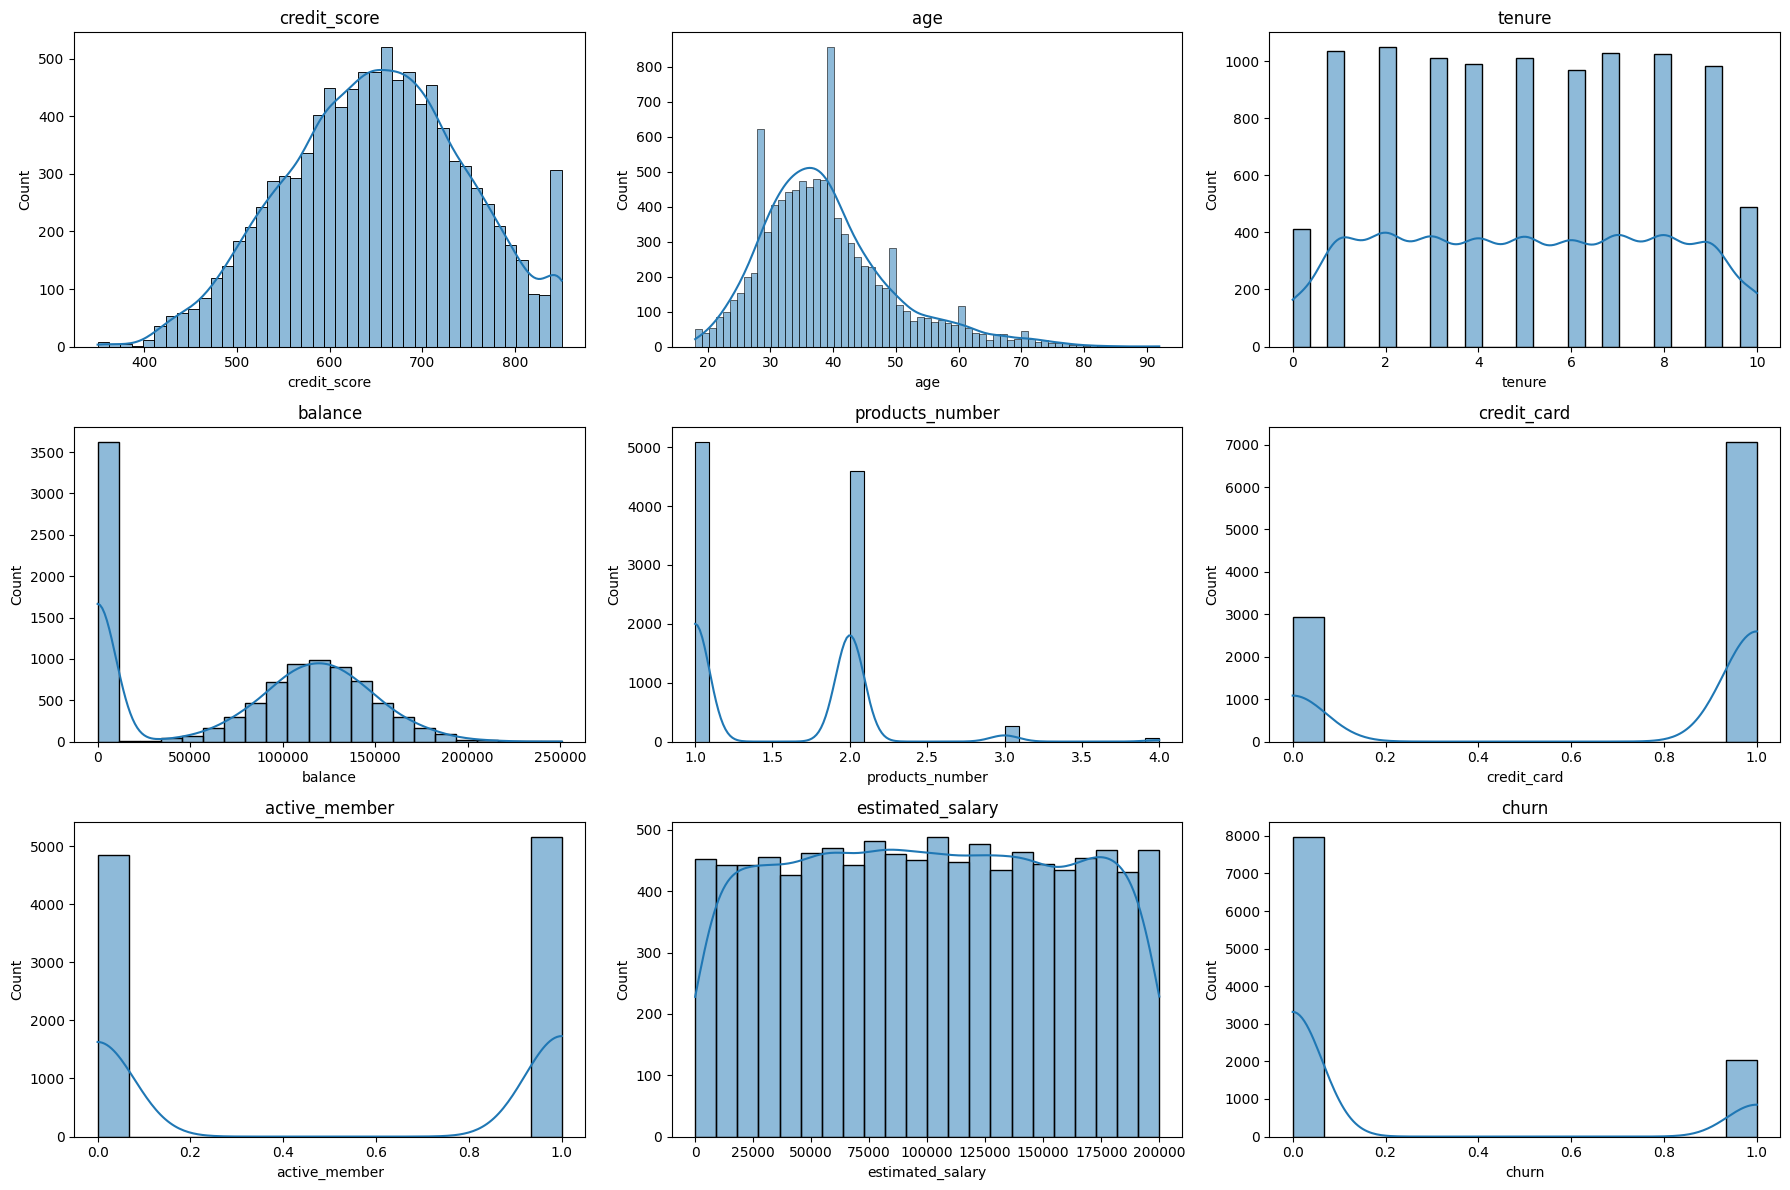

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numcols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

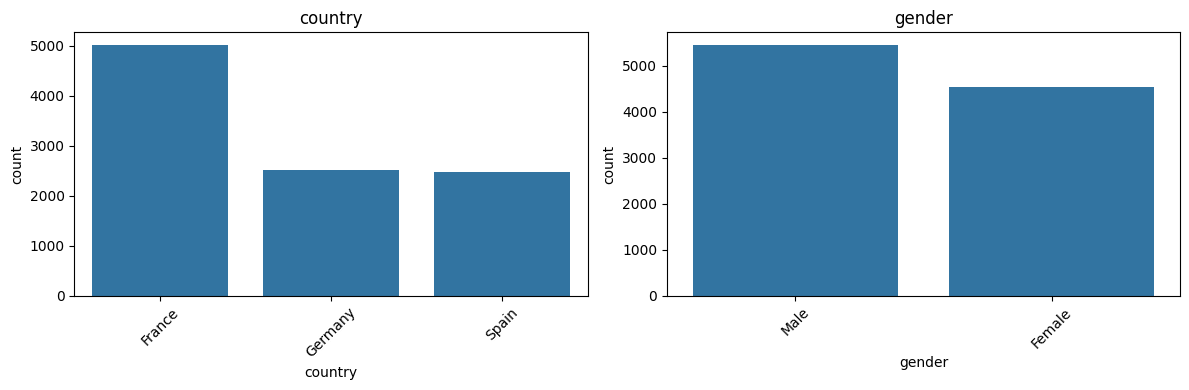

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, col in enumerate(catcols):
    sns.countplot(x=df[col], ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

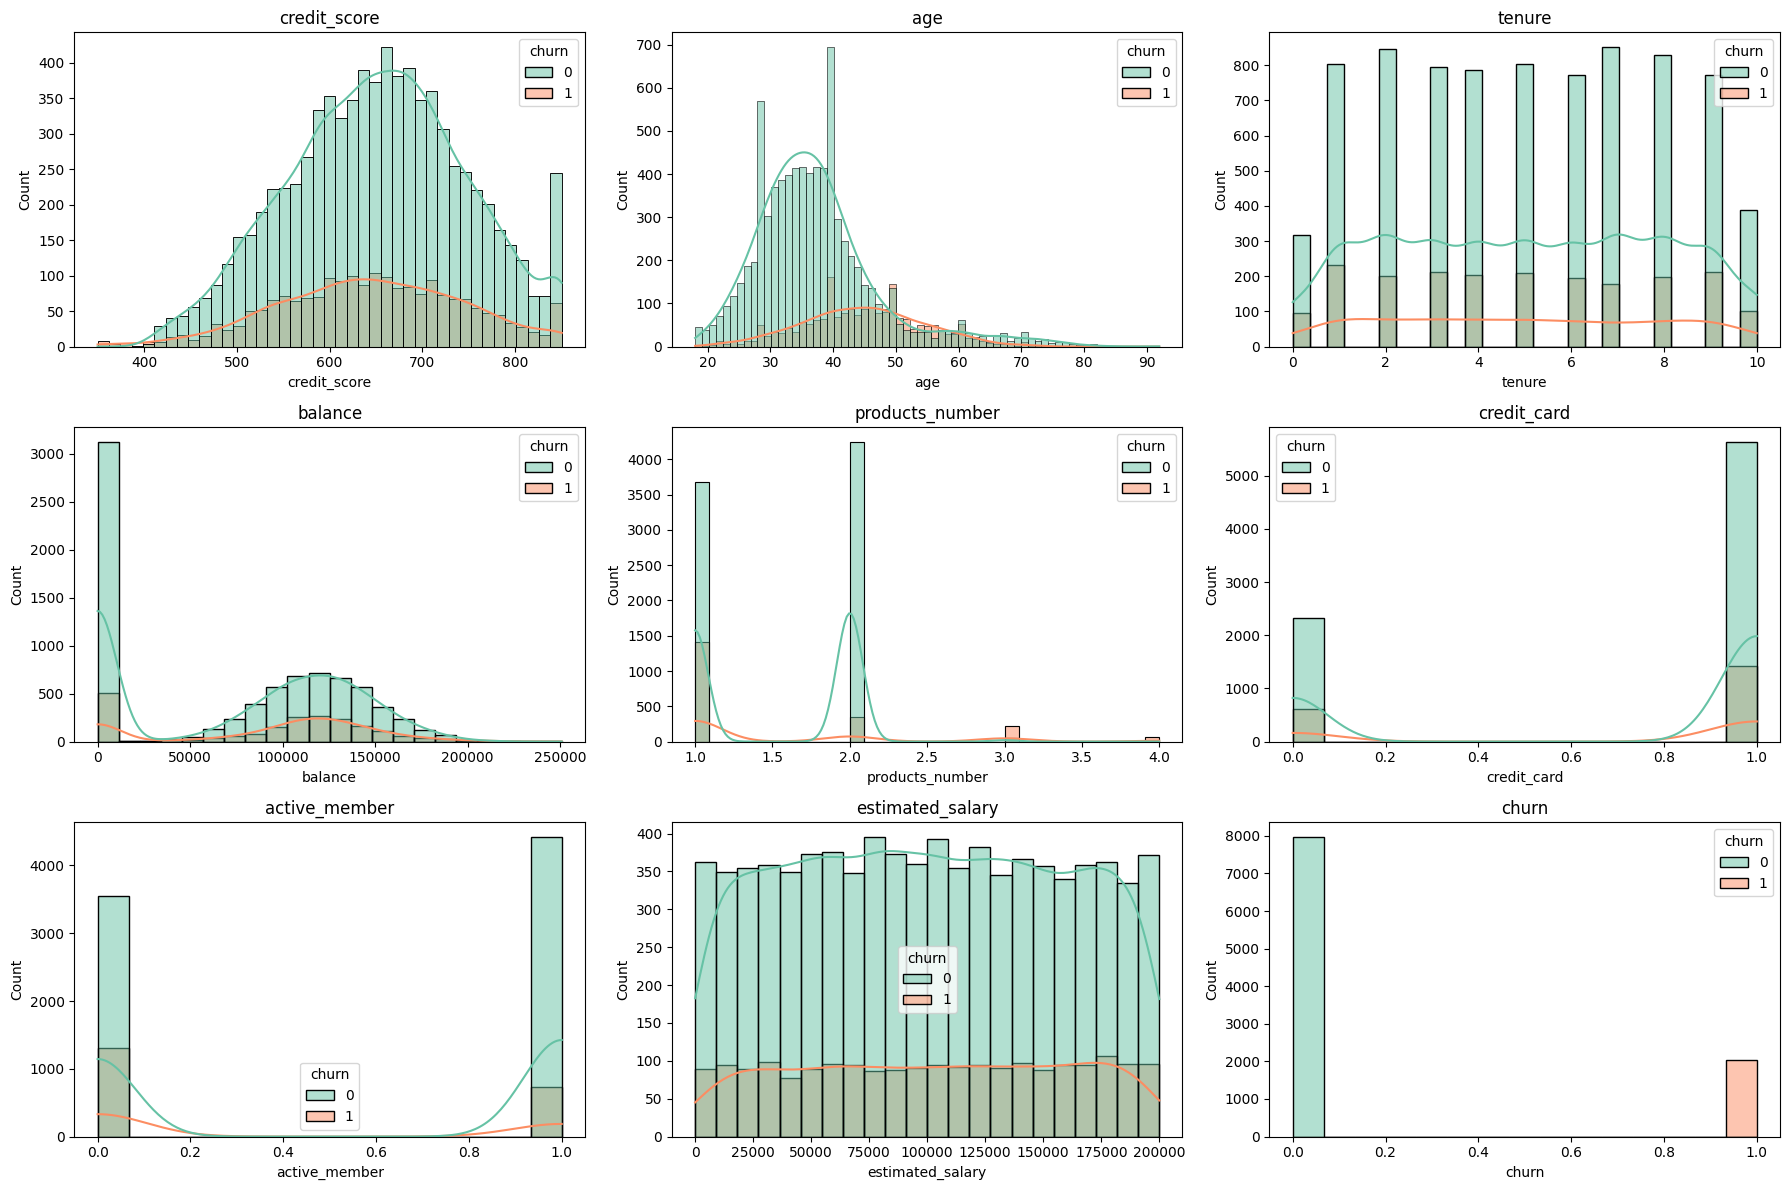

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numcols):
    sns.histplot(data=df, x=col, hue='churn', kde=True, ax=axes[i], palette="Set2")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [17]:
df.groupby('churn')[numcols].mean()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
churn,,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0


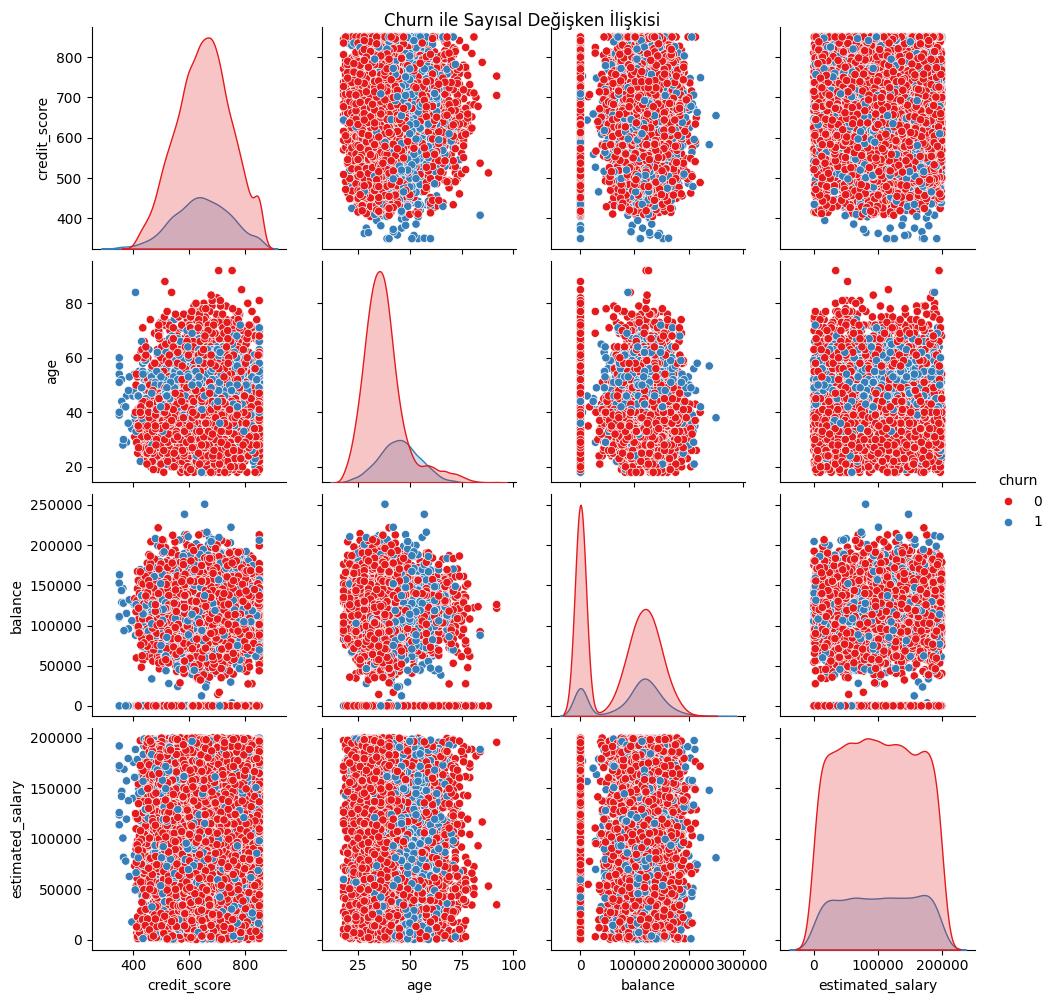

In [18]:
num_sür_cols=['credit_score', 'age','balance', 'estimated_salary','churn']

sns.pairplot(df[num_sür_cols], hue='churn', palette='Set1')
plt.suptitle("Churn ile Sayısal Değişken İlişkisi", y=1 )
plt.show()


In [19]:
cat_cols = ['country', 'gender', 'credit_card', 'active_member']

for col in cat_cols:
    print(f"\n-- {col} ile churn ilişkisi:")
    print(pd.crosstab(df[col], df['churn'], normalize='index') * 100)


-- country ile churn ilişkisi:
churn            0          1
country                      
France   83.845233  16.154767
Germany  67.556796  32.443204
Spain    83.326605  16.673395

-- gender ile churn ilişkisi:
churn           0          1
gender                      
Female  74.928461  25.071539
Male    83.544072  16.455928

-- credit_card ile churn ilişkisi:
churn                0          1
credit_card                      
0            79.185059  20.814941
1            79.815734  20.184266

-- active_member ile churn ilişkisi:
churn                  0          1
active_member                      
0              73.149103  26.850897
1              85.730926  14.269074


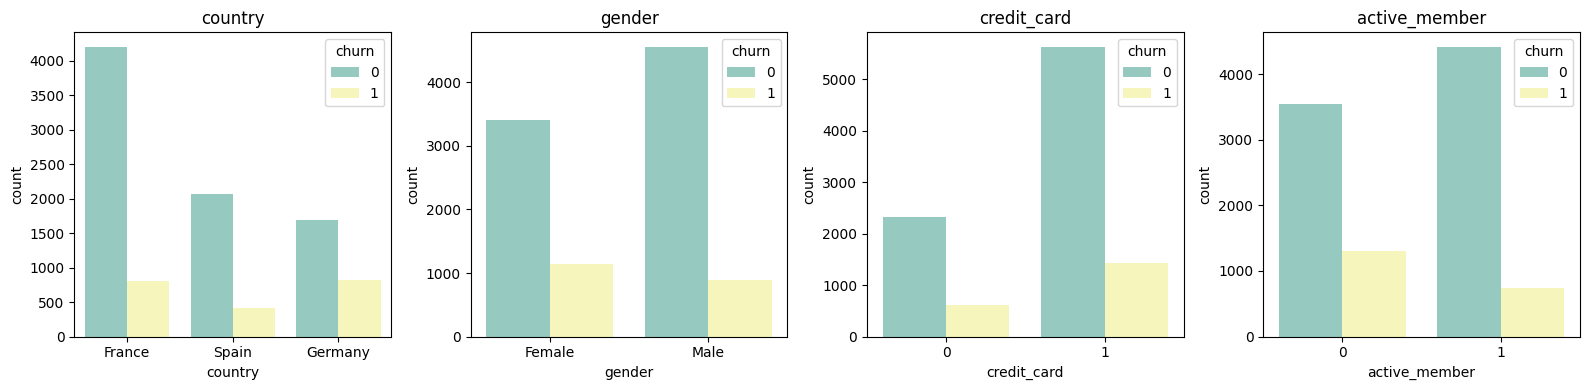

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='churn', ax=axes[i], palette='Set3')
    axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()

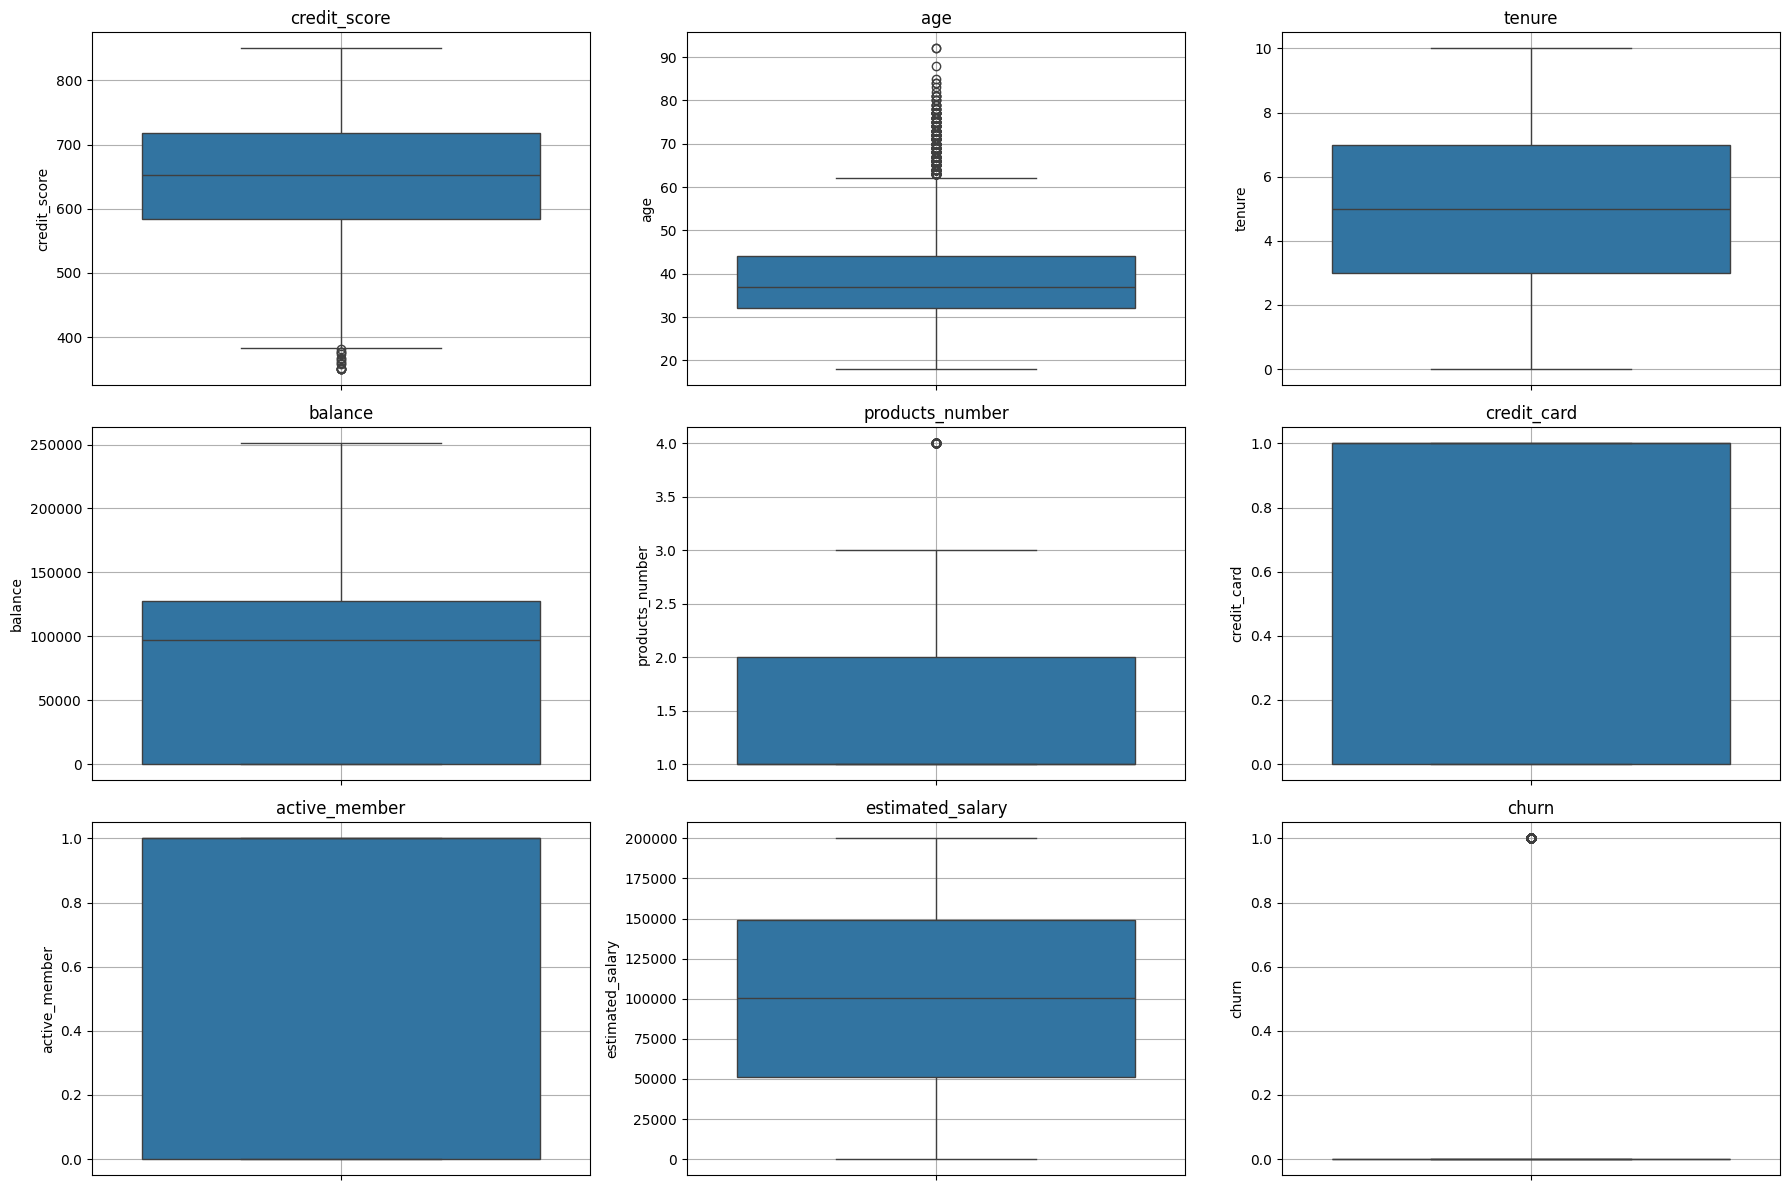

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numcols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [22]:
def genel_aykiri_orani(df):
    summary = []
    for col in numcols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        oran = len(outliers) / len(df) * 100
        summary.append({
            "Değişken": col,
            "Aykırı Değer Sayısı": len(outliers),
            "Toplam Gözlem": len(df),
            "Aykırı Oranı (%)": round(oran, 2)
        })
    return pd.DataFrame(summary)

genel_aykiri_orani(df)

,Değişken,Aykırı Değer Sayısı,Toplam Gözlem,Aykırı Oranı (%)
0,credit_score,15,10000,0.15
1,age,359,10000,3.59
2,tenure,0,10000,0.00
3,balance,0,10000,0.00
4,products_number,60,10000,0.60
5,credit_card,0,10000,0.00
6,active_member,0,10000,0.00
7,estimated_salary,0,10000,0.00
8,churn,2037,10000,20.37


In [23]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [24]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['age'] = df['age'].clip(lower=lower, upper=upper)

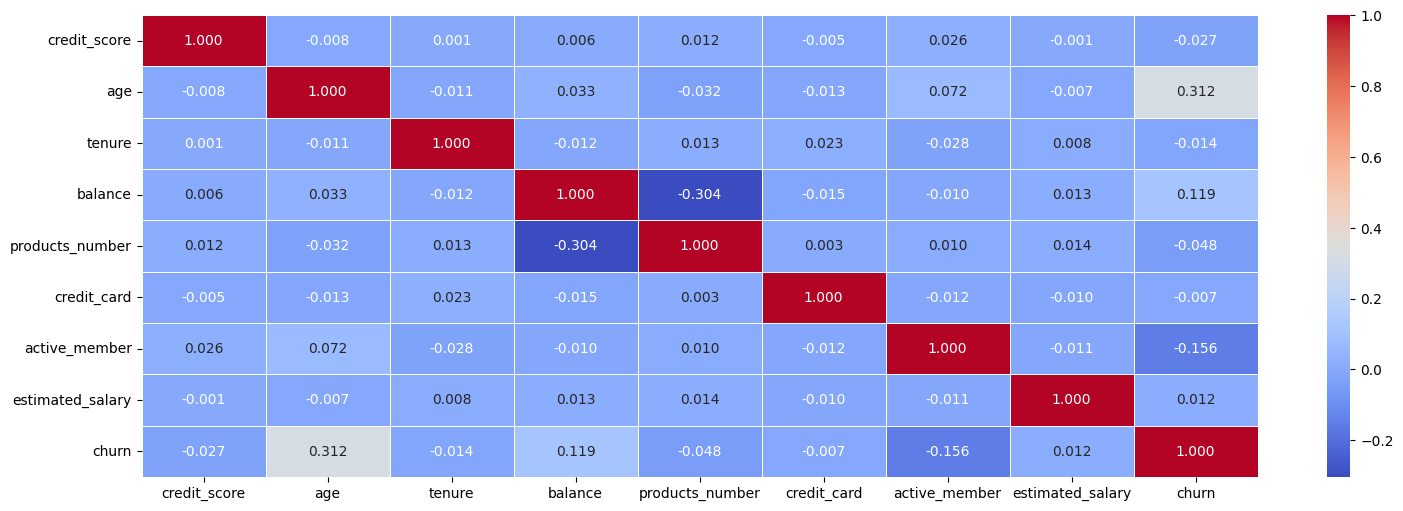

In [25]:
cm = df[numcols].corr()

plt.figure(figsize=(18, 6))
sns.heatmap(cm, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5)
plt.show()

# Data Preprocessing

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [27]:
df = pd.get_dummies(df, columns=['country'], drop_first=False, dtype=int)

In [28]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
customer_id,,,,,,,,,,,,,
15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   gender            10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_France    10000 non-null  int64  
 11  country_Germany   10000 non-null  int64  
 12  country_Spain     10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.1 MB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
age,10000.0,38.660800,9.746704,18.00,32.00,37.000,44.0000,62.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
products_number,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [31]:
df.groupby('churn').mean().T

churn,0,1
credit_score,651.853196,645.351497
gender,0.572523,0.440844
age,37.120683,44.681394
tenure,5.033279,4.932744
balance,72745.296779,91108.539337
products_number,1.544267,1.475209
credit_card,0.707146,0.699067
active_member,0.554565,0.360825
estimated_salary,99738.391772,101465.677531
country_France,0.527942,0.397644


# Model Building

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
Accuracy: 0.724
ROC AUC: 0.7875167642834863
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1607
           1       0.39      0.73      0.51       393

    accuracy                           0.72      2000
   macro avg       0.65      0.73      0.66      2000
weighted avg       0.81      0.72      0.75      2000



In [34]:
lr_model.coef_

array([[-0.06860467, -0.27700705,  0.85166297, -0.03774907,  0.17188955,
        -0.05290376, -0.01451081, -0.46198547,  0.01669177, -0.13436662,
         0.22164434, -0.06695205]])

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print("SVM (Support Vector Machine)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_proba_svm))
print(classification_report(y_test, y_pred_svm))

SVM (Support Vector Machine)
Accuracy: 0.7845
ROC AUC: 0.8475127107707848
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.47      0.75      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.78      0.80      2000



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.7835
ROC AUC: 0.4277255518556696
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.50      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


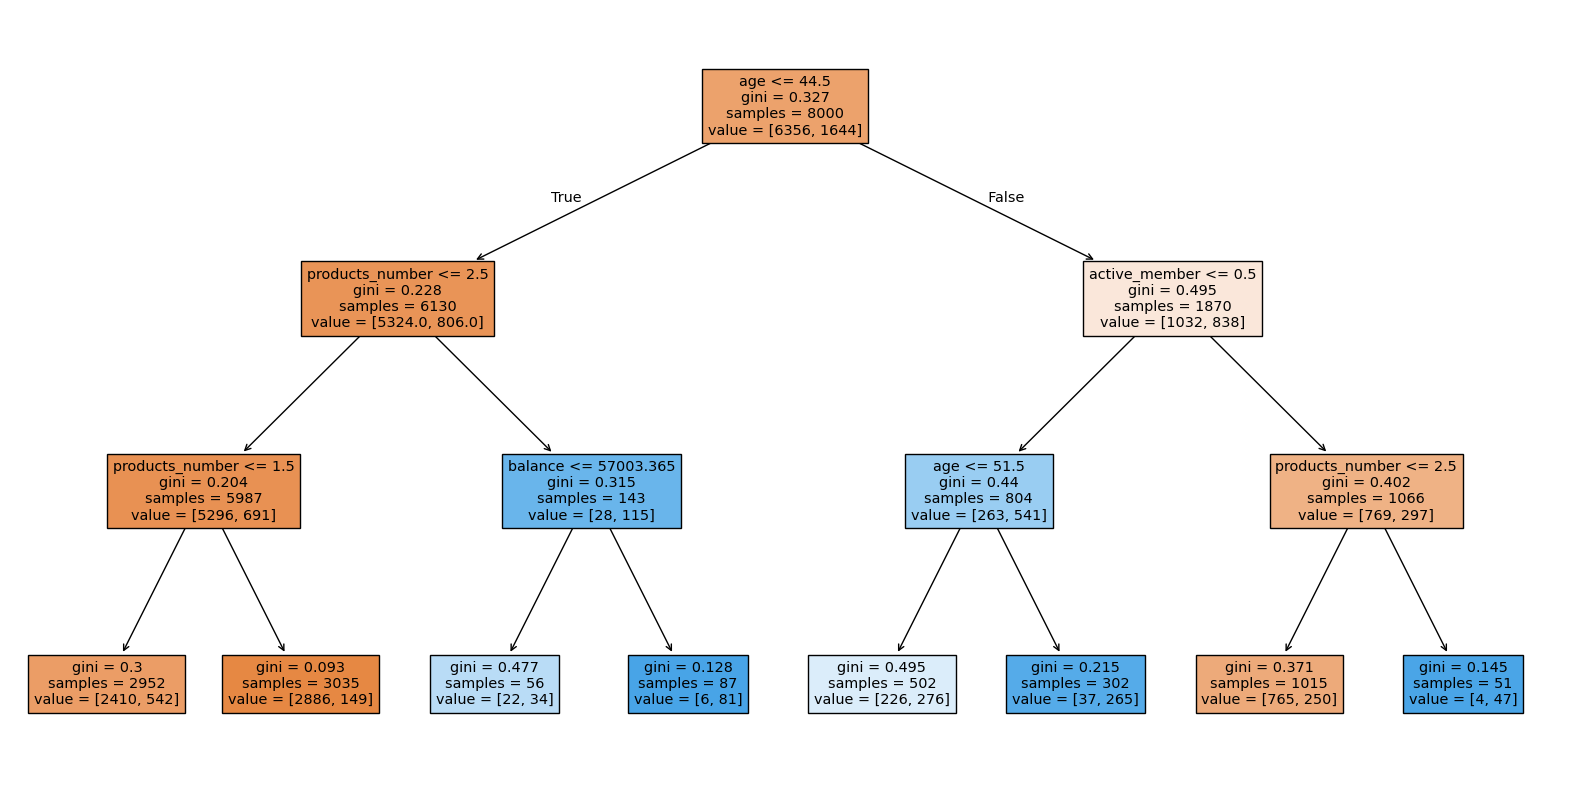

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model2 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model2.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model2,
          filled=True,
          feature_names=X.columns)
plt.show()

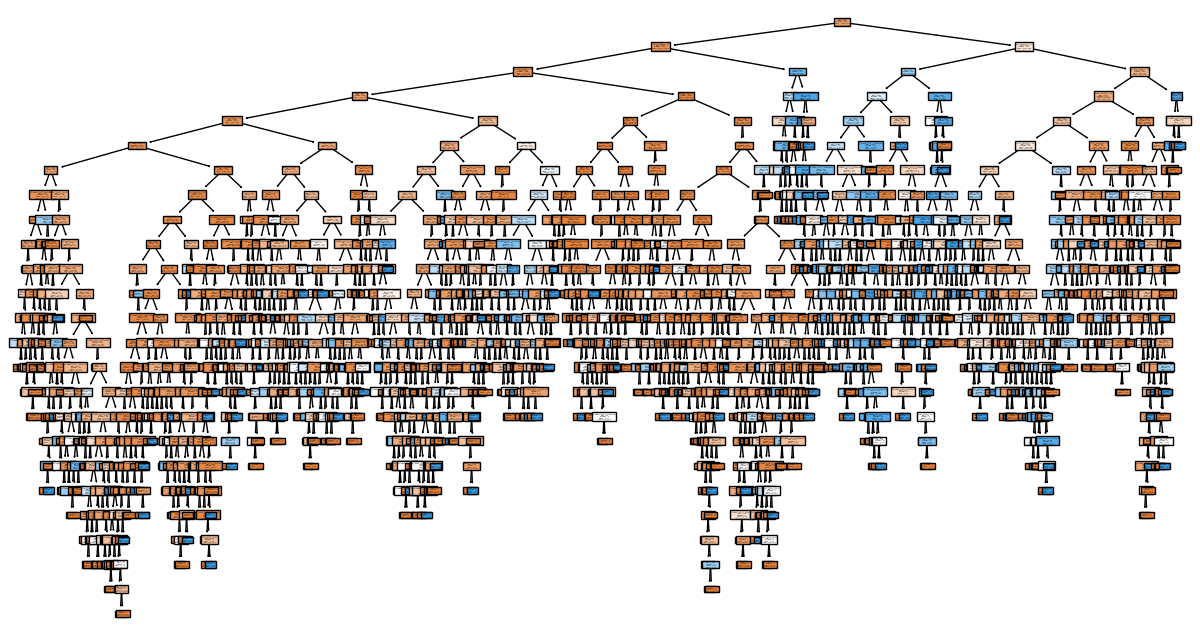

In [38]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["Not Churn", "Churn"])
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print(" Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))

 Random Forest
Accuracy: 0.8695
ROC AUC: 0.8599210515065292
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



***XGBOOST***



In [40]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False,
                          eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(" XGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:54:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost
Accuracy: 0.862
ROC AUC: 0.8479188537426114
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.70      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
spw = neg / pos

param_grid = {
    'max_depth': [3, 5, 7],                 # Ağaçların derinliği
    'learning_rate': [0.01,0.05, 0.1],      # Öğrenme hızı
    'n_estimators': [100, 200],             # Ağaç sayısı
    'scale_pos_weight': [spw]
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='recall',
                    cv=3,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_
print("Best parameters:", grid.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': np.float64(3.8661800486618003)}


In [42]:
y_pred_best = best_xgb.predict(X_test)
y_proba_best = best_xgb.predict_proba(X_test)[:, 1]

print(" XGBoost (Tuned)")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_proba_best))
print(classification_report(y_test, y_pred_best))

 XGBoost (Tuned)
Accuracy: 0.803
ROC AUC: 0.8607547133960678
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1607
           1       0.50      0.77      0.61       393

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.82      2000



In [43]:
y_pred_train = best_xgb.predict(X_train)
train_score = roc_auc_score(y_train, best_xgb.predict_proba(X_train)[:, 1])

y_pred_test = best_xgb.predict(X_test)
test_score = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

print(f"Train ROC AUC: {train_score:.4f}")
print(f"Test ROC AUC : {test_score:.4f}")

Train ROC AUC: 0.8693
Test ROC AUC : 0.8608


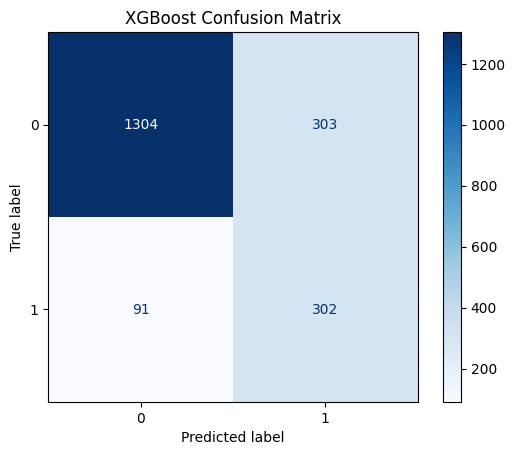

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test, cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()

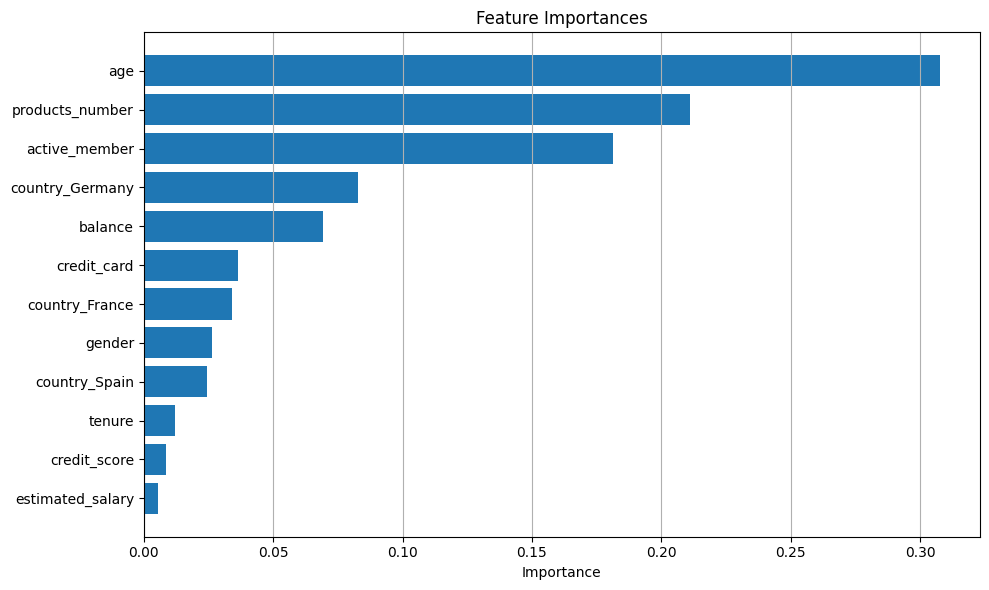

In [45]:
importances = best_xgb.feature_importances_
feature_names = X_test.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

<ipython-input-46-6b90befafc03>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_rate = test_df.groupby('Age_Group')['Churn'].mean()


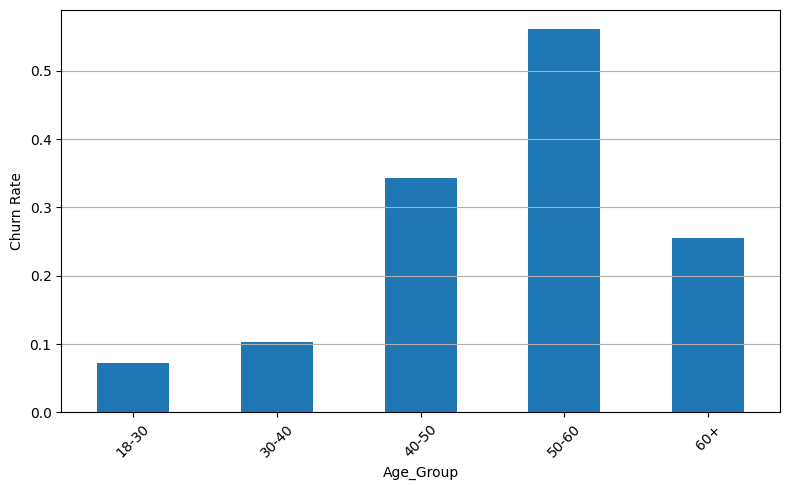

In [46]:
test_df = X_test.copy()
test_df['Churn'] = y_test.values

test_df['Age_Group'] = pd.cut(test_df['age'], bins=[18, 30, 40, 50, 60, 100],
                              labels=['18-30', '30-40', '40-50', '50-60', '60+'])
age_churn_rate = test_df.groupby('Age_Group')['Churn'].mean()

plt.figure(figsize=(8, 5))
age_churn_rate.plot(kind='bar')
plt.ylabel('Churn Rate')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

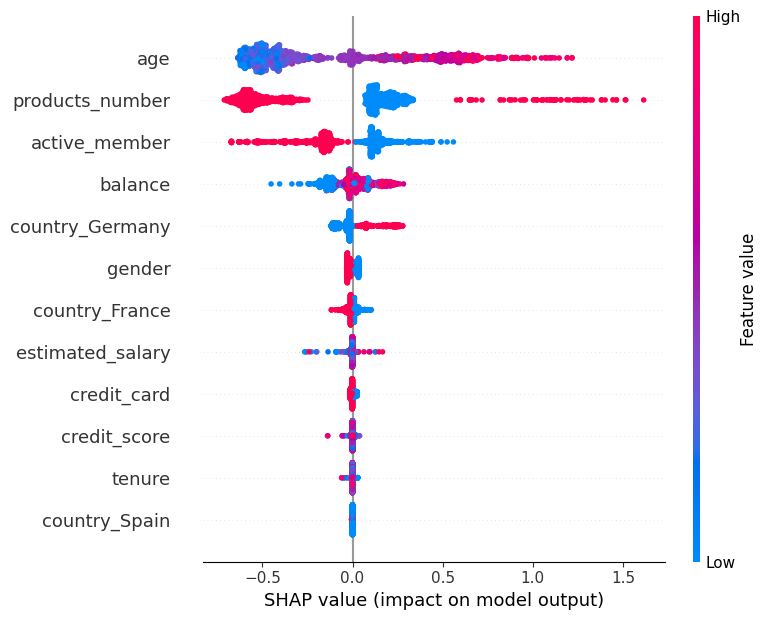

In [47]:
import shap
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)



#  Model Comparison

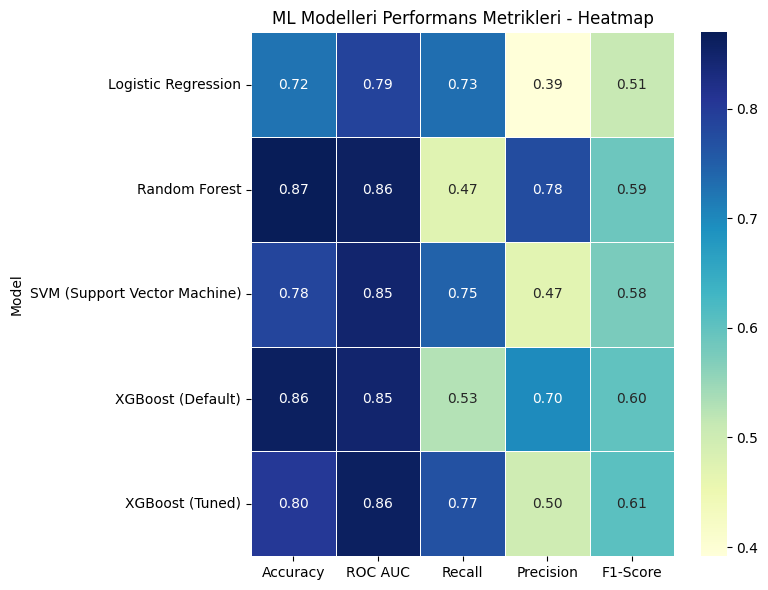

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

predictions = {
    "Logistic Regression": lr_model.predict(X_test_scaled),
    "Random Forest": rf_model.predict(X_test),
    "SVM (Support Vector Machine)" : svm_model.predict(X_test_scaled),
    "XGBoost (Default)": xgb_model.predict(X_test),
    "XGBoost (Tuned)": best_xgb.predict(X_test)
}

probas = {
    "Logistic Regression": lr_model.predict_proba(X_test_scaled)[:, 1],
    "Random Forest": rf_model.predict_proba(X_test)[:, 1],
    "SVM (Support Vector Machine)": svm_model.predict_proba(X_test_scaled)[:,1],
    "XGBoost (Default)": xgb_model.predict_proba(X_test)[:, 1],
    "XGBoost (Tuned)": best_xgb.predict_proba(X_test)[:, 1]
}

metric_list = []
for model_name in predictions:
    y_pred = predictions[model_name]
    y_prob = probas[model_name]

    metric_list.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

df_vs = pd.DataFrame(metric_list).set_index("Model")

plt.figure(figsize=(8, 6))
sns.heatmap(df_vs, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("ML Modelleri Performans Metrikleri - Heatmap")
plt.tight_layout()
plt.show()

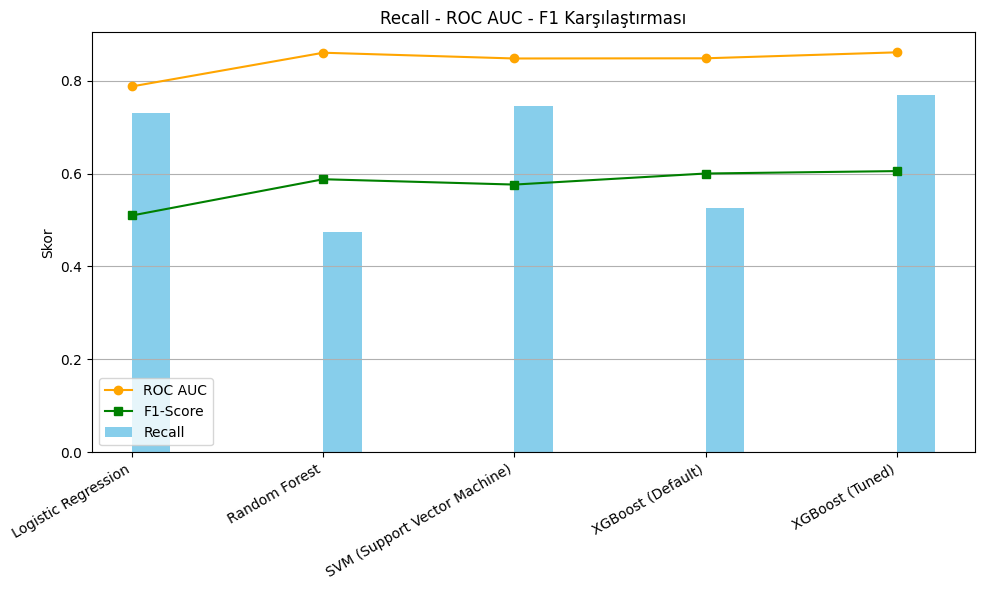

In [49]:


plt.figure(figsize=(10, 6))
x = np.arange(len(df_vs))

plt.bar(x + 0.1, df_vs["Recall"], width=0.2, label="Recall", color='skyblue')
plt.plot(x, df_vs["ROC AUC"], marker='o', label="ROC AUC", color='orange')
plt.plot(x, df_vs["F1-Score"], marker='s', label="F1-Score", color='green')

plt.xticks(x, df_vs.index, rotation=30, ha='right')
plt.ylabel("Skor")

plt.title("Recall - ROC AUC - F1 Karşılaştırması")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Customer Segmentation

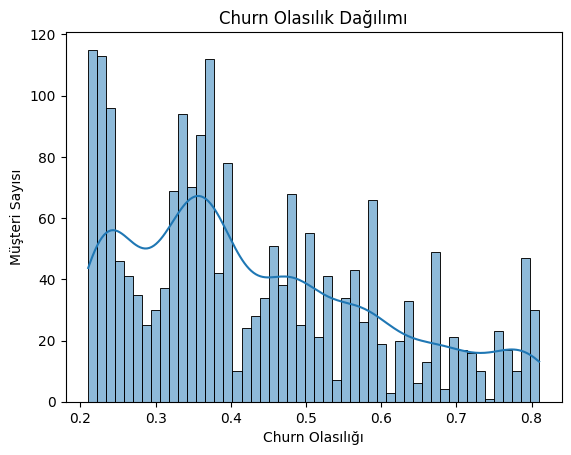

In [51]:
churn_proba = best_xgb.predict_proba(X_test)[:, 1]

sns.histplot(churn_proba, bins=50, kde=True)
plt.title("Churn Olasılık Dağılımı")
plt.xlabel("Churn Olasılığı")
plt.ylabel("Müşteri Sayısı")
plt.show()

In [52]:
def churn_segment(model, X):

    df_segment = X.copy()
    df_segment["churn_proba"] = model.predict_proba(X)[:, 1]
    df_segment["segment"] = df_segment["churn_proba"].apply(
        lambda prob: "High Risk" if prob >= 0.75 else (
            "Medium Risk" if prob >= 0.5 else "Low Risk"
        )
    )
    return df_segment

df_segment = churn_segment(best_xgb, X_test)

In [53]:
df_segment.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,churn_proba,segment
customer_id,,,,,,,,,,,,,,
15687492,596,1,32,3,96709.07,2,0,0,41788.37,0,1,0,0.323459,Low Risk
15736963,623,1,43,1,0.00,2,1,1,146379.30,1,0,0,0.321226,Low Risk
15721730,601,0,44,4,0.00,2,1,0,58561.31,0,0,1,0.400120,Low Risk
15762134,506,1,59,8,119152.10,2,1,1,170679.74,0,1,0,0.488888,Low Risk
15648898,560,0,27,7,124995.98,1,1,1,114669.79,0,0,1,0.344127,Low Risk


In [54]:
high_risk_customers = df_segment[df_segment["segment"] == "High Risk"]

print(high_risk_customers.head())

             credit_score  gender  age  tenure    balance  products_number  \
customer_id                                                                  
15767474              481       0   57       9       0.00                3   
15785367              651       0   56       4       0.00                1   
15647385              579       1   56       4   99340.83                1   
15800061              495       0   45       3   89158.94                3   
15672056              710       1   43       2  140080.32                3   

             credit_card  active_member  estimated_salary  country_France  \
customer_id                                                                 
15767474               1              1         169719.35               1   
15785367               0              0          84383.22               1   
15647385               0              0           4523.74               0   
15800061               1              0         135169.76           

In [55]:
high_risk_customers = df_segment[df_segment["segment"] == "High Risk"]

print(high_risk_customers.describe())

       credit_score      gender         age      tenure        balance  \
count    127.000000  127.000000  127.000000  127.000000     127.000000   
mean     632.204724    0.480315   50.771654    5.346457   91047.325433   
std      108.966380    0.501591    8.522788    2.942243   56067.218985   
min      350.000000    0.000000   28.000000    0.000000       0.000000   
25%      560.000000    0.000000   45.000000    3.000000   61029.230000   
50%      633.000000    0.000000   52.000000    5.000000  109196.660000   
75%      697.500000    1.000000   57.000000    8.000000  128833.310000   
max      850.000000    1.000000   62.000000   10.000000  195238.290000   

       products_number  credit_card  active_member  estimated_salary  \
count       127.000000   127.000000     127.000000        127.000000   
mean          1.968504     0.811024       0.133858     101709.965197   
std           1.090631     0.393040       0.341848      60514.322831   
min           1.000000     0.000000       0.0

In [56]:
high_risk_customers = df_segment[df_segment["segment"] == "Medium Risk"]

print(high_risk_customers.describe())

       credit_score      gender         age      tenure        balance  \
count    478.000000  478.000000  478.000000  478.000000     478.000000   
mean     651.719665    0.500000   44.403766    4.918410   97886.257490   
std       97.981691    0.500524    7.657100    3.005871   53717.732933   
min      350.000000    0.000000   19.000000    0.000000       0.000000   
25%      584.750000    0.000000   40.000000    2.000000   80420.882500   
50%      656.500000    0.500000   44.000000    5.000000  112515.345000   
75%      720.750000    1.000000   48.000000    8.000000  131083.177500   
max      850.000000    1.000000   62.000000   10.000000  216109.880000   

       products_number  credit_card  active_member  estimated_salary  \
count       478.000000   478.000000     478.000000        478.000000   
mean          1.146444     0.705021       0.466527      96113.481548   
std           0.461855     0.456511       0.499401      58670.249442   
min           1.000000     0.000000       0.0

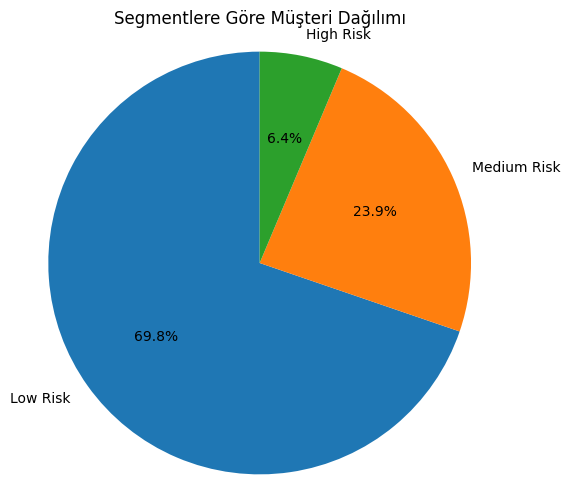

In [57]:
segment_counts = df_segment["segment"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Segmentlere Göre Müşteri Dağılımı")
plt.axis('equal')
plt.show()

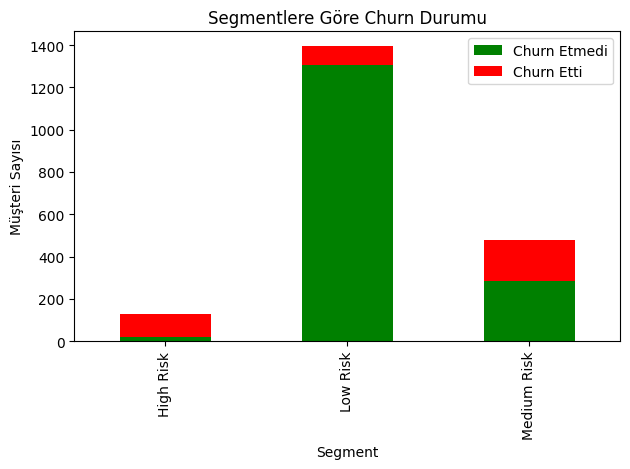

In [58]:
cross_tab = pd.crosstab(df_segment["segment"], y_test)

cross_tab = cross_tab[[0, 1]]

cross_tab.plot(kind="bar", stacked=True, color=["green",
                                                "red"])
plt.title("Segmentlere Göre Churn Durumu")
plt.xlabel("Segment")
plt.ylabel("Müşteri Sayısı")
plt.legend(["Churn Etmedi", "Churn Etti"])
plt.tight_layout()
plt.show()

# New Customer Churn Prediction

In [59]:
ornek_data = pd.DataFrame({
    "credit_score": [400, 400, 200, 600, 630, 640, 580],
    "gender": ["Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "age": [45, 35, 32, 55, 45, 43, 55],
    "tenure": [6, 5, 6, 5, 1, 2, 1],
    "balance": [95000, 15000, 12000, 95000, 85000, 90000, 4000],
    "products_number": [1, 1, 2, 1, 2, 2, 1],
    "credit_card": [1, 1, 1, 1, 1, 1, 0],
    "active_member": [1, 1, 0, 1, 0, 0, 0],
    "estimated_salary": [60000, 70000, 65000, 75000, 82000, 80000, 45000],
    "country_France": [1, 1, 1, 1, 1, 1, 0],
    "country_Germany": [0, 0, 0, 0, 0, 0, 1],
    "country_Spain": [0, 0, 0, 0, 0, 0, 0]
})


In [60]:
ornek_data['gender'] = ornek_data['gender'].map({'Female': 0, 'Male': 1})

In [61]:
features = ['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
            'credit_card', 'active_member', 'estimated_salary',
            'country_France', 'country_Germany', 'country_Spain']

ornek_data_ = ornek_data[features]

ornek_data['churn_proba'] = best_xgb.predict_proba(ornek_data_)[:, 1]
ornek_data['churn_pred'] = best_xgb.predict(ornek_data_)

ornek_data = churn_segment(best_xgb, ornek_data_)[['segment']].join(ornek_data)

print(ornek_data[['churn_proba', 'churn_pred', 'segment']])

   churn_proba  churn_pred      segment
0     0.588040           1  Medium Risk
1     0.469766           0     Low Risk
2     0.235759           0     Low Risk
3     0.584347           1  Medium Risk
4     0.503611           1  Medium Risk
5     0.420587           0     Low Risk
6     0.793044           1    High Risk
